In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv(r'adult_mortality_indonesia.csv')
df.head()

,year,female,male
0,1990,185.624,234.896
1,1991,183.488,229.230
2,1992,179.502,224.371
3,1993,170.382,216.580
4,1994,174.249,215.981


In [3]:
df.describe()

,year,female,male
count,34.000000,34.000000,34.000000
mean,2006.500000,168.123971,214.119529
std,9.958246,13.481929,11.982962
min,1990.000000,137.866000,189.258000
25%,1998.250000,160.760000,208.201250
50%,2006.500000,170.412000,214.761000
75%,2014.750000,176.421250,218.559250
max,2023.000000,199.153000,246.673000


# Tren Mortalitas

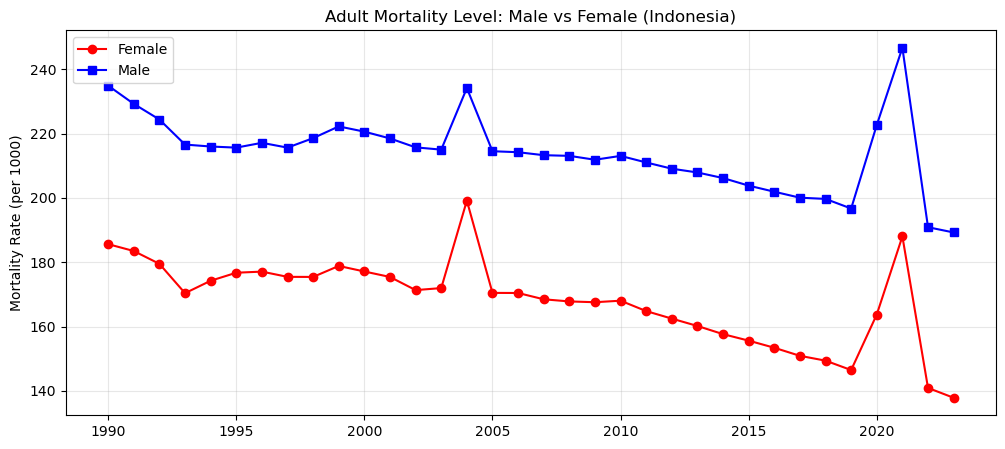

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(df['year'], df['female'], label='Female', color='red', marker='o')
plt.plot(df['year'], df['male'], label='Male', color='blue', marker='s')
plt.title('Adult Mortality Level: Male vs Female (Indonesia)')
plt.ylabel('Mortality Rate (per 1000)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Transformasi log

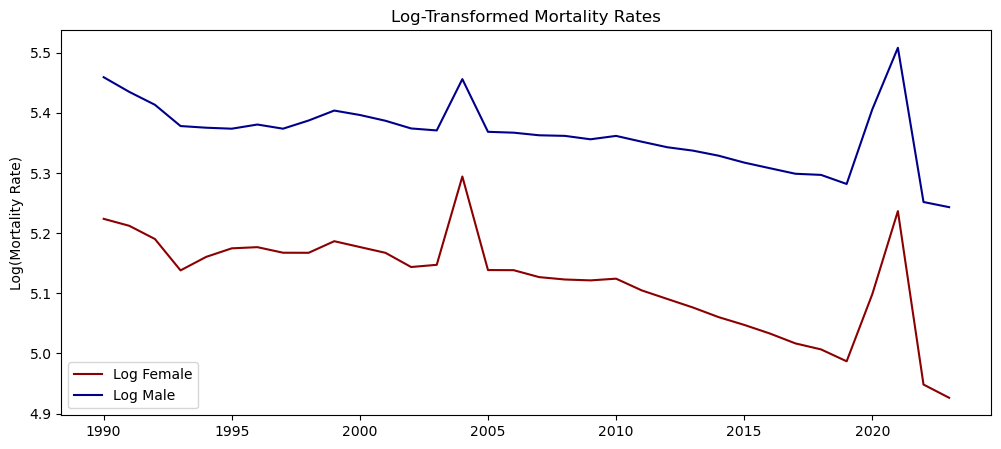

In [5]:
df['log_female'] = np.log(df['female'])
df['log_male'] = np.log(df['male'])

plt.figure(figsize=(12, 5))
plt.plot(df['year'], df['log_female'], label='Log Female', color='darkred')
plt.plot(df['year'], df['log_male'], label='Log Male', color='darkblue')
plt.title('Log-Transformed Mortality Rates')
plt.ylabel('Log(Mortality Rate)')
plt.legend()
plt.show()

# Growth Rate & Gender Ratio

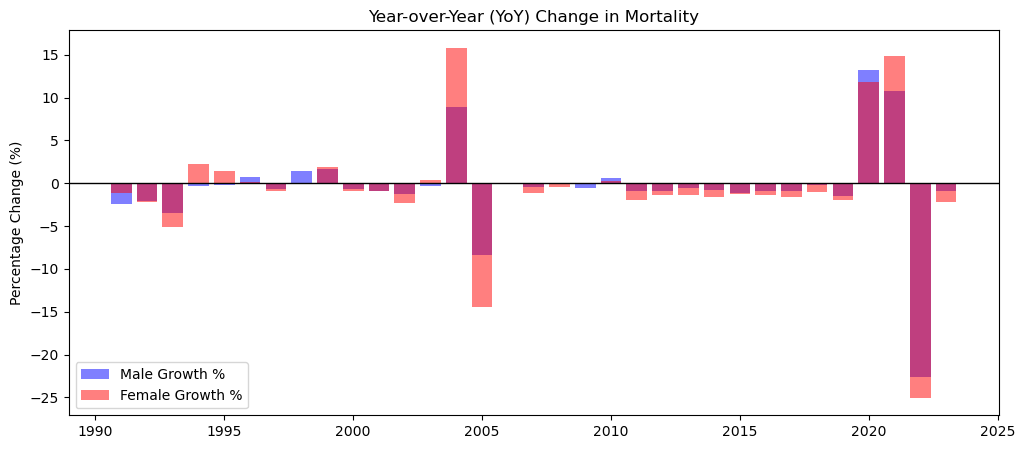

In [6]:
df['female_growth'] = df['female'].pct_change() * 100
df['male_growth'] = df['male'].pct_change() * 100

plt.figure(figsize=(12, 5))
plt.bar(df['year'], df['male_growth'], alpha=0.5, label='Male Growth %', color='blue')
plt.bar(df['year'], df['female_growth'], alpha=0.5, label='Female Growth %', color='red')
plt.axhline(0, color='black', lw=1)
plt.title('Year-over-Year (YoY) Change in Mortality')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

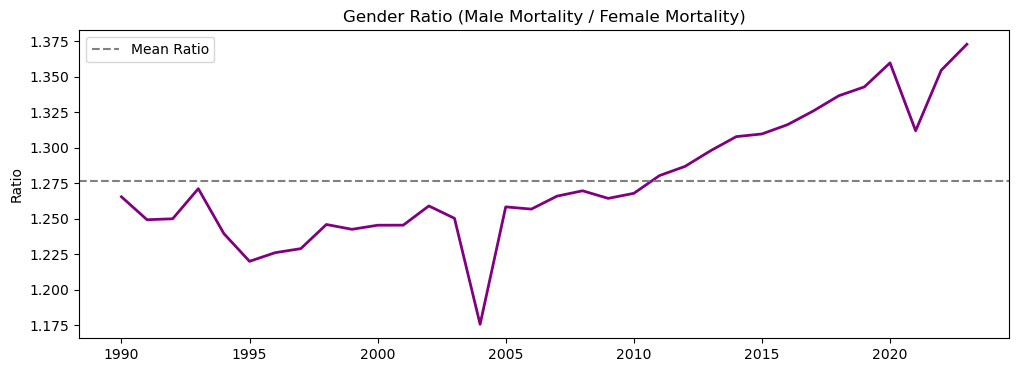

In [7]:
df['gender_ratio'] = df['male'] / df['female']

plt.figure(figsize=(12, 4))
plt.plot(df['year'], df['gender_ratio'], color='purple', linewidth=2)
plt.axhline(df['gender_ratio'].mean(), linestyle='--', color='gray', label='Mean Ratio')
plt.title('Gender Ratio (Male Mortality / Female Mortality)')
plt.ylabel('Ratio')
plt.legend()
plt.show()

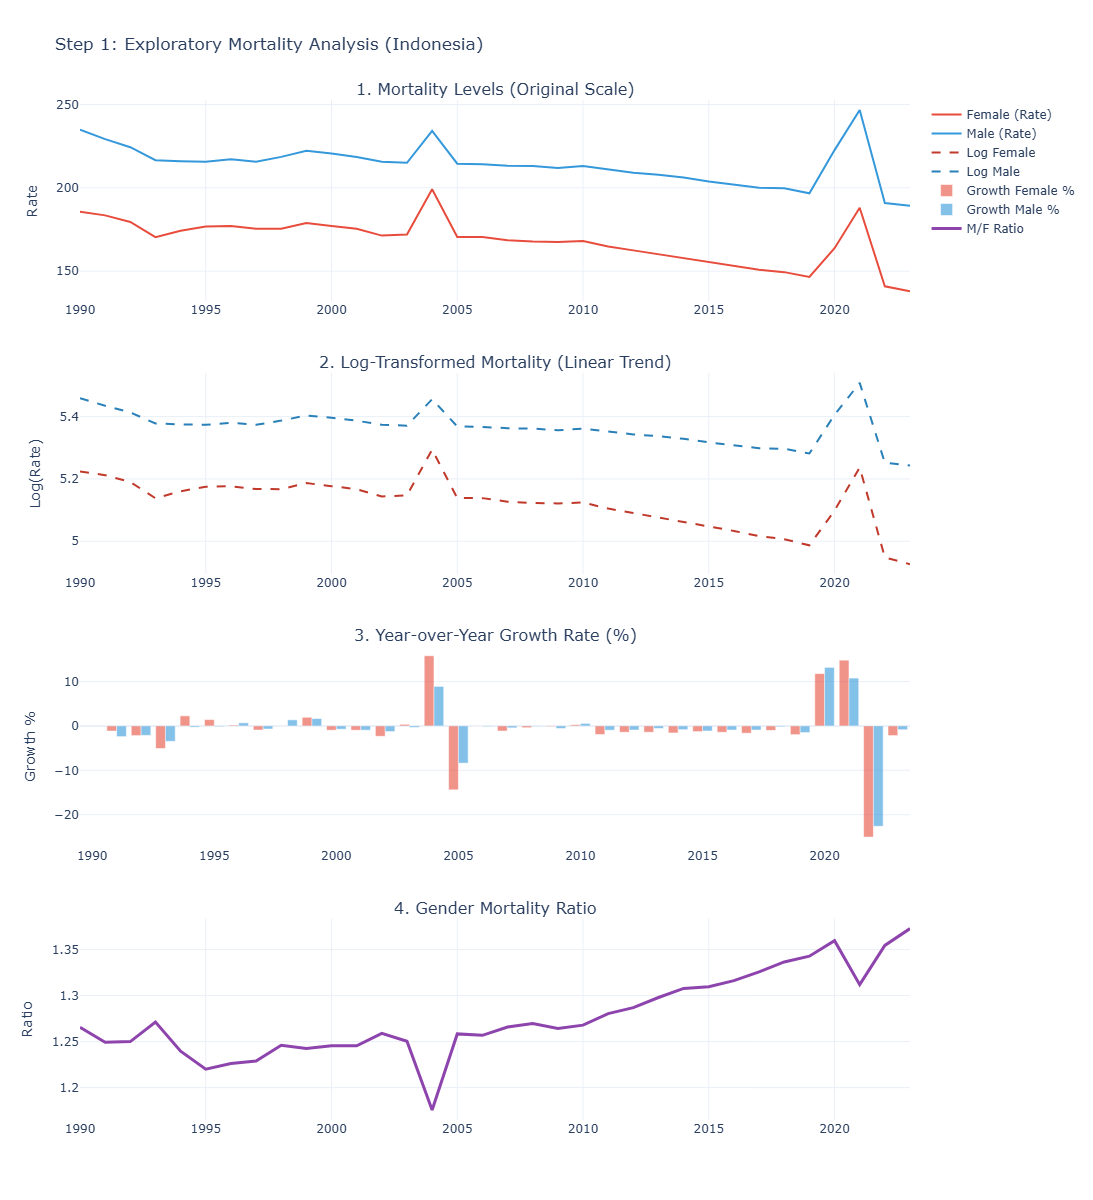

In [8]:
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=(
        "1. Mortality Levels (Original Scale)", 
        "2. Log-Transformed Mortality (Linear Trend)", 
        "3. Year-over-Year Growth Rate (%)", 
        "4. Gender Mortality Ratio"
    ),
    vertical_spacing=0.07
)

fig.add_trace(go.Scatter(x=df['year'], y=df['female'], name='Female (Rate)', line=dict(color='#e74c3c')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['year'], y=df['male'], name='Male (Rate)', line=dict(color='#3498db')), row=1, col=1)

fig.add_trace(go.Scatter(x=df['year'], y=df['log_female'], name='Log Female', line=dict(color='#c0392b', dash='dash')), row=2, col=1)
fig.add_trace(go.Scatter(x=df['year'], y=df['log_male'], name='Log Male', line=dict(color='#2980b9', dash='dash')), row=2, col=1)

fig.add_trace(go.Bar(x=df['year'], y=df['female_growth'], name='Growth Female %', marker_color='#e74c3c', opacity=0.6), row=3, col=1)
fig.add_trace(go.Bar(x=df['year'], y=df['male_growth'], name='Growth Male %', marker_color='#3498db', opacity=0.6), row=3, col=1)

fig.add_trace(go.Scatter(x=df['year'], y=df['gender_ratio'], name='M/F Ratio', line=dict(color='#8e44ad', width=3)), row=4, col=1)

fig.update_layout(
    height=1200, 
    title_text="Step 1: Exploratory Mortality Analysis (Indonesia)",
    template="plotly_white",
    hovermode="x unified"
)

fig.update_yaxes(title_text="Rate", row=1, col=1)
fig.update_yaxes(title_text="Log(Rate)", row=2, col=1)
fig.update_yaxes(title_text="Growth %", row=3, col=1)
fig.update_yaxes(title_text="Ratio", row=4, col=1)

fig.show()

### Key Takeaways
- Adult mortality shows a long-term declining trend
- Male mortality consistently higher than female
- Gender gap remains persistent but gradually narrowing